In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Salary Data.csv")
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [4]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

In [5]:
print("Dimensi data:", df.shape)
print("\nTipe data setiap kolom:\n", df.dtypes)
print("\nJumlah missing values per kolom:\n", df.isnull().sum())
print("\nStatistik deskriptif numerik:\n", df.describe())

Dimensi data: (375, 6)

Tipe data setiap kolom:
 Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

Jumlah missing values per kolom:
 Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

Statistik deskriptif numerik:
               Age  Years of Experience         Salary
count  373.000000           373.000000     373.000000
mean    37.431635            10.030831  100577.345845
std      7.069073             6.557007   48240.013482
min     23.000000             0.000000     350.000000
25%     31.000000             4.000000   55000.000000
50%     36.000000             9.000000   95000.000000
75%     44.000000            15.000000  140000.000000
max     53.000000            25.000000  250000.000000


In [6]:
print("\nJumlah kategori unik per kolom kategorikal:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()}")



Jumlah kategori unik per kolom kategorikal:
Gender: 2
Education Level: 3
Job Title: 174


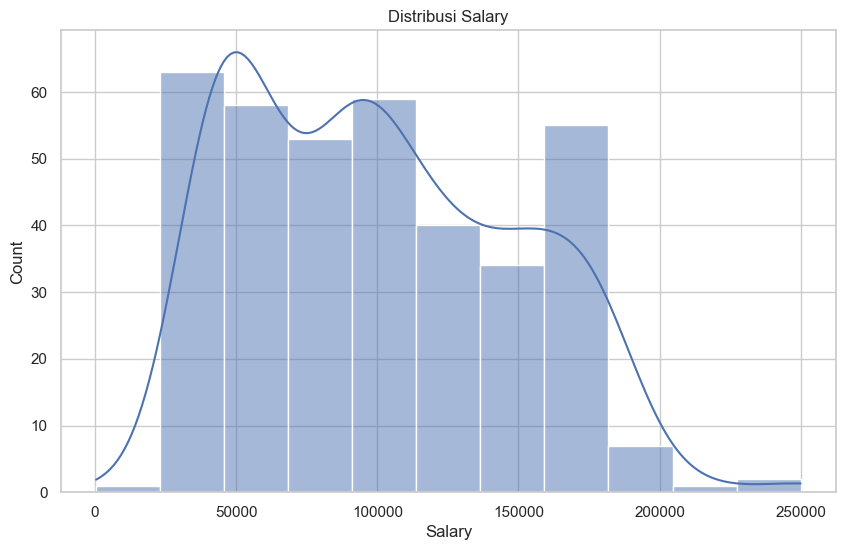

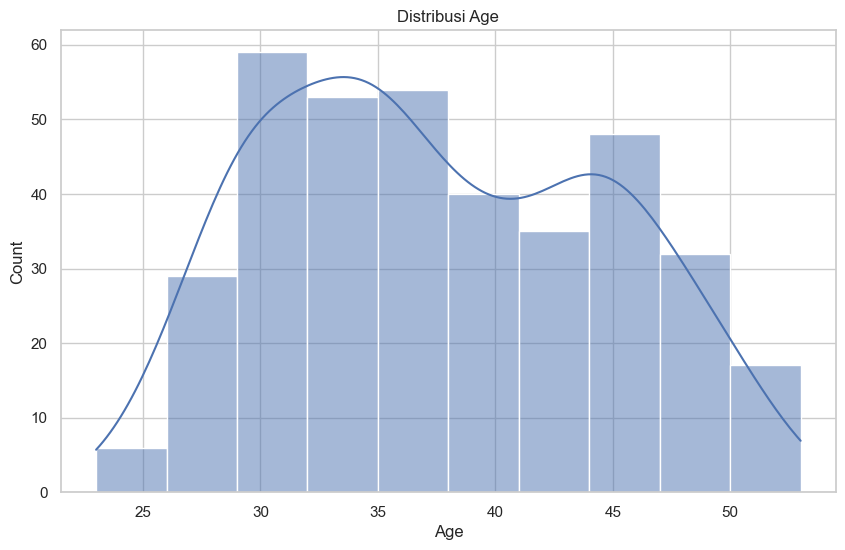

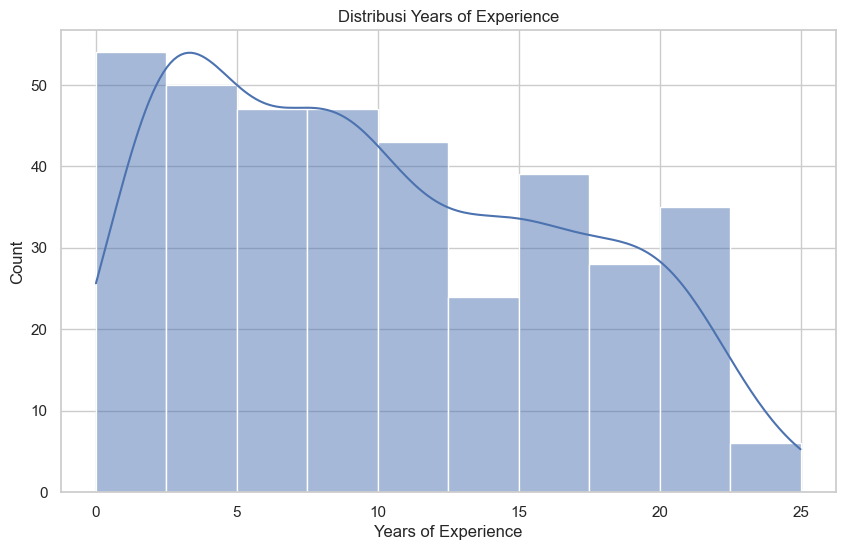

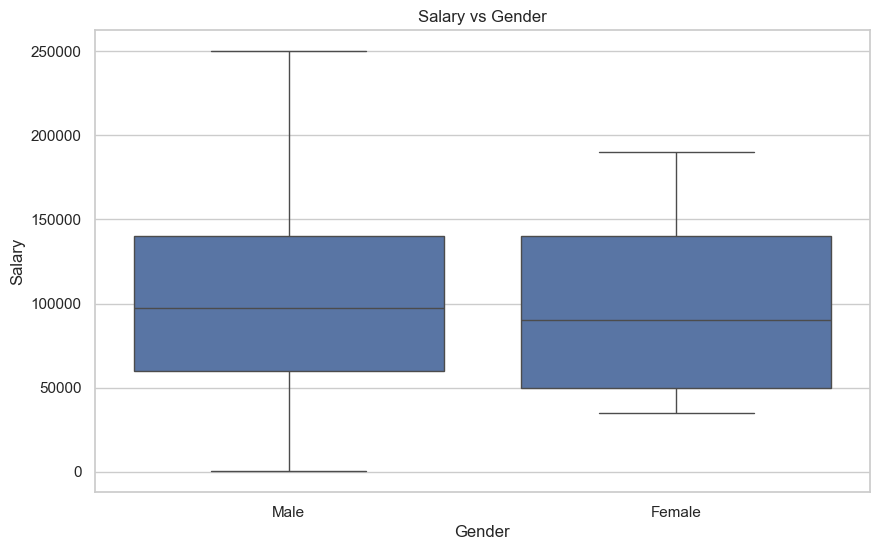

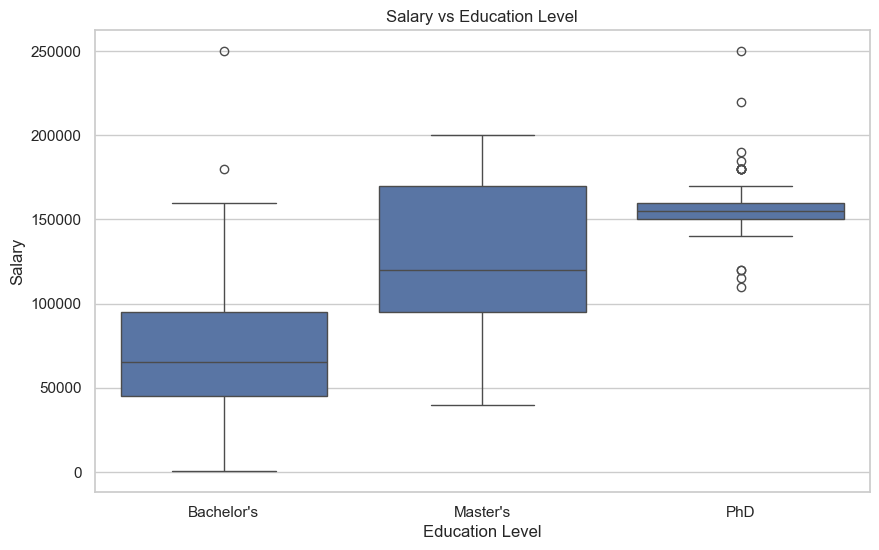

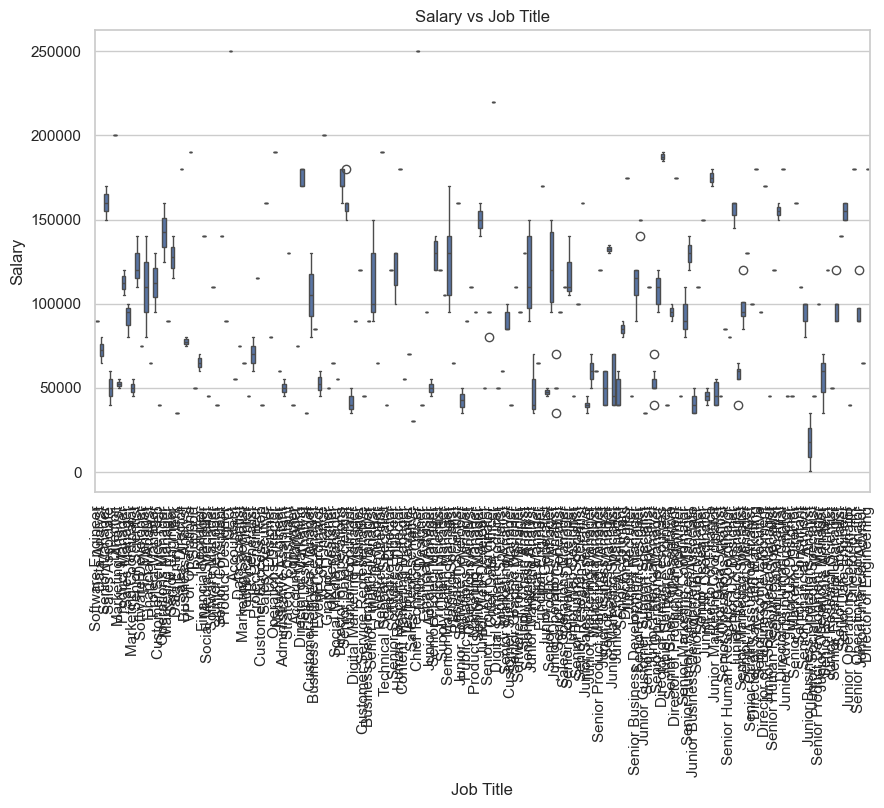

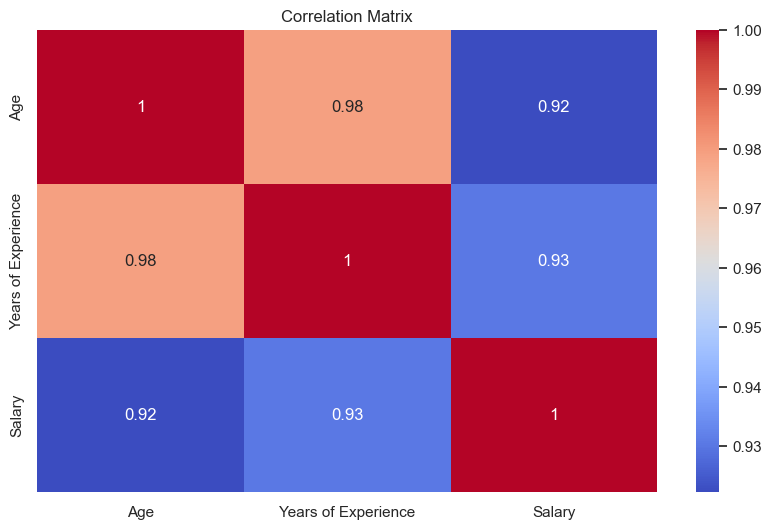

In [7]:
sns.histplot(df['Salary'], kde=True)
plt.title('Distribusi Salary')
plt.show()

# Distribusi Age
sns.histplot(df['Age'], kde=True)
plt.title('Distribusi Age')
plt.show()

# Distribusi Years of Experience
sns.histplot(df['Years of Experience'], kde=True)
plt.title('Distribusi Years of Experience')
plt.show()

# Boxplot Salary vs Gender
sns.boxplot(x='Gender', y='Salary', data=df)
plt.title('Salary vs Gender')
plt.show()

# Boxplot Salary vs Education Level
sns.boxplot(x='Education Level', y='Salary', data=df)
plt.title('Salary vs Education Level')
plt.show()

sns.boxplot(x='Job Title', y='Salary', data=df)
plt.xticks(rotation=90)
plt.title('Salary vs Job Title')
plt.show()

corr_matrix = df[['Age', 'Years of Experience', 'Salary']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [13]:
num_cols = ['Age', 'Years of Experience', 'Salary']
for col in num_cols:
    median_value = df[col].median()
    df.fillna({col: median_value}, inplace=True)
    print(f"Imputasi missing value kolom {col} dengan median: {median_value}")

Imputasi missing value kolom Age dengan median: 36.0
Imputasi missing value kolom Years of Experience dengan median: 9.0
Imputasi missing value kolom Salary dengan median: 95000.0


In [14]:
cat_cols = ['Gender', 'Education Level', 'Job Title']
for col in cat_cols:
    mode_value = df[col].mode()[0]
    df.fillna({col: mode_value}, inplace=True)
    print(f"Imputasi missing value kolom {col} dengan modus: {mode_value}")

Imputasi missing value kolom Gender dengan modus: Male
Imputasi missing value kolom Education Level dengan modus: Bachelor's
Imputasi missing value kolom Job Title dengan modus: Director of Marketing


In [15]:
print("\nSalary sebelum menangani outlier:")
print(df['Salary'].describe())

df.loc[df['Salary'] < 1000, 'Salary'] = df['Salary'].median()
print("\nGanti salary < 1000 dengan median salary")

print("\nSalary setelah menangani outlier:")
print(df['Salary'].describe())



Salary sebelum menangani outlier:
count       375.000000
mean     100800.000000
std       47832.987074
min       30000.000000
25%       55000.000000
50%       95000.000000
75%      140000.000000
max      250000.000000
Name: Salary, dtype: float64

Ganti salary < 1000 dengan median salary

Salary setelah menangani outlier:
count       375.000000
mean     100800.000000
std       47832.987074
min       30000.000000
25%       55000.000000
50%       95000.000000
75%      140000.000000
max      250000.000000
Name: Salary, dtype: float64


In [16]:
cat_cols = ['Gender', 'Education Level', 'Job Title']

for col in cat_cols:
    print(f"\nDistribusi {col}:")
    print(df[col].value_counts())
    print("\nPersentase:")
    print(df[col].value_counts(normalize=True) * 100)


Distribusi Gender:
Gender
Male      196
Female    179
Name: count, dtype: int64

Persentase:
Gender
Male      52.266667
Female    47.733333
Name: proportion, dtype: float64

Distribusi Education Level:
Education Level
Bachelor's    226
Master's       98
PhD            51
Name: count, dtype: int64

Persentase:
Education Level
Bachelor's    60.266667
Master's      26.133333
PhD           13.600000
Name: proportion, dtype: float64

Distribusi Job Title:
Job Title
Director of Marketing              14
Director of Operations             11
Senior Business Analyst            10
Senior Marketing Analyst            9
Senior Marketing Manager            9
                                   ..
Business Development Manager        1
Customer Service Representative     1
IT Manager                          1
Digital Marketing Manager           1
Junior Web Developer                1
Name: count, Length: 174, dtype: int64

Persentase:
Job Title
Director of Marketing              3.733333
Director o

In [17]:
print("\nStatistik salary:")
print(df['Salary'].describe())


Statistik salary:
count       375.000000
mean     100800.000000
std       47832.987074
min       30000.000000
25%       55000.000000
50%       95000.000000
75%      140000.000000
max      250000.000000
Name: Salary, dtype: float64


In [18]:
skew = df['Salary'].skew()
print(f"\nSkewness salary: {skew}")

if abs(skew) > 1:
    print("Distribusi salary sangat skewed → pertimbangkan transformasi log")
elif abs(skew) > 0.5:
    print("Distribusi salary agak skewed")
else:
    print("Distribusi salary cukup simetris")


Skewness salary: 0.4193601618552011
Distribusi salary cukup simetris


In [19]:
def simplify_job_title(title):
    title = title.lower()
    if 'director' in title:
        return 'Director'
    elif 'manager' in title:
        return 'Manager'
    elif 'senior' in title:
        return 'Senior'
    elif 'junior' in title:
        return 'Junior'
    elif 'analyst' in title:
        return 'Analyst'
    elif 'engineer' in title:
        return 'Engineer'
    else:
        return 'Other'

df['Job Group'] = df['Job Title'].apply(simplify_job_title)

print("\nDistribusi Job Group (setelah grouping):")
print(df['Job Group'].value_counts())
print(df['Job Group'].value_counts(normalize=True) * 100)


Distribusi Job Group (setelah grouping):
Job Group
Senior      102
Manager      96
Junior       72
Other        46
Director     44
Analyst      11
Engineer      4
Name: count, dtype: int64
Job Group
Senior      27.200000
Manager     25.600000
Junior      19.200000
Other       12.266667
Director    11.733333
Analyst      2.933333
Engineer     1.066667
Name: proportion, dtype: float64


In [21]:
df['Education Group'] = df['Education Level'].apply(lambda x: 'PhD' if x == 'PhD' else 'Non-PhD')

print("\nDistribusi Education Group:")
print(df['Education Group'].value_counts())
print(df['Education Group'].value_counts(normalize=True) * 100)


Distribusi Education Group:
Education Group
Non-PhD    324
PhD         51
Name: count, dtype: int64
Education Group
Non-PhD    86.4
PhD        13.6
Name: proportion, dtype: float64


In [22]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Job Group,Education Group
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,Engineer,Non-PhD
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,Analyst,Non-PhD
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Manager,PhD
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,Other,Non-PhD
4,52.0,Male,Master's,Director,20.0,200000.0,Director,Non-PhD
...,...,...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0,Senior,Non-PhD
371,43.0,Male,Master's,Director of Operations,19.0,170000.0,Director,Non-PhD
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0,Manager,Non-PhD
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0,Senior,Non-PhD


In [23]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

In [24]:
# Gender → Label Encoding (Male=1, Female=0)
df['Gender_encoded'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

# Education Group → Label Encoding (Non-PhD=0, PhD=1)
df['Education_encoded'] = df['Education Group'].apply(lambda x: 1 if x == 'PhD' else 0)

# Job Group → One-Hot Encoding
job_group_ohe = pd.get_dummies(df['Job Group'], prefix='Job')

In [25]:
scaler = StandardScaler()

df[['Age_scaled', 'Exp_scaled']] = scaler.fit_transform(df[['Age', 'Years of Experience']])

In [26]:
X = pd.concat([
    df[['Age_scaled', 'Exp_scaled', 'Gender_encoded', 'Education_encoded']],
    job_group_ohe
], axis=1)

y = df['Salary']

In [27]:
X

,Age_scaled,Exp_scaled,Gender_encoded,Education_encoded,Job_Analyst,Job_Director,Job_Engineer,Job_Junior,Job_Manager,Job_Other,Job_Senior
0,-0.770289,-0.769440,1,0,False,False,True,False,False,False,False
1,-1.338349,-1.075664,0,0,True,False,False,False,False,False,False
2,1.075905,0.761682,1,1,False,False,False,False,True,False,False
3,-0.202229,-0.463215,0,0,False,False,False,False,False,True,False
4,2.070010,1.527243,1,0,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
370,-0.344244,-0.310103,0,0,False,False,False,False,False,False,True
371,0.791875,1.374131,1,0,False,True,False,False,False,False,False
372,-1.196334,-1.228776,0,0,False,False,False,False,True,False,False
373,-0.486259,-0.463215,1,0,False,False,False,False,False,False,True


In [28]:
y

0       90000.0
1       65000.0
2      150000.0
3       60000.0
4      200000.0
         ...   
370     85000.0
371    170000.0
372     40000.0
373     90000.0
374    150000.0
Name: Salary, Length: 375, dtype: float64

In [29]:
# Age bucket
df['Age_bucket'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60], labels=['20-30', '30-40', '40-50', '50-60'])

# Experience bucket
df['Exp_bucket'] = pd.cut(df['Years of Experience'], bins=[0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

# Panjang teks Job Title
df['Title_length'] = df['Job Title'].apply(lambda x: len(str(x)))

# Flag Senior & Director
df['Is_senior_title'] = df['Job Title'].str.lower().str.contains('senior').astype(int)
df['Is_director_title'] = df['Job Title'].str.lower().str.contains('director').astype(int)

In [30]:
# Age_bucket & Exp_bucket → One-Hot Encoding
bucket_ohe = pd.get_dummies(df[['Age_bucket','Exp_bucket']], prefix=['Age','Exp'])

# Education Level asli → One-Hot
edu_ohe = pd.get_dummies(df['Education Level'], prefix='Edu')

# Job Group → sudah ada job_group_ohe sebelumnya
job_group_ohe = pd.get_dummies(df['Job Group'], prefix='Job')

In [31]:
num_cols = ['Age', 'Years of Experience', 'Title_length']
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[num_cols]), columns=[col+'_scaled' for col in num_cols])

In [32]:
X = pd.concat([
    df_scaled,
    df[['Gender_encoded', 'Education_encoded', 'Is_senior_title', 'Is_director_title']],
    bucket_ohe,
    edu_ohe,
    job_group_ohe
], axis=1)

y = df['Salary']

In [33]:
X

,Age_scaled,Years of Experience_scaled,Title_length_scaled,Gender_encoded,Education_encoded,Is_senior_title,Is_director_title,Age_20-30,Age_30-40,Age_40-50,...,Edu_Bachelor's,Edu_Master's,Edu_PhD,Job_Analyst,Job_Director,Job_Engineer,Job_Junior,Job_Manager,Job_Other,Job_Senior
0,-0.770289,-0.769440,-0.964990,1,0,0,0,False,True,False,...,True,False,False,False,False,True,False,False,False,False
1,-1.338349,-1.075664,-1.893817,0,0,0,0,True,False,False,...,False,True,False,True,False,False,False,False,False,False
2,1.075905,0.761682,-1.522286,1,1,1,0,False,False,True,...,False,False,True,False,False,False,False,True,False,False
3,-0.202229,-0.463215,-1.336521,0,0,0,0,False,True,False,...,True,False,False,False,False,False,False,False,True,False
4,2.070010,1.527243,-2.636879,1,0,0,1,False,False,False,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,-0.344244,-0.310103,0.335369,0,0,1,0,False,True,False,...,True,False,False,False,False,False,False,False,False,True
371,0.791875,1.374131,-0.036162,1,0,0,1,False,False,True,...,False,True,False,False,True,False,False,False,False,False
372,-1.196334,-1.228776,-0.036162,0,0,0,0,True,False,False,...,True,False,False,False,False,False,False,True,False,False
373,-0.486259,-0.463215,1.264196,1,0,1,0,False,True,False,...,True,False,False,False,False,False,False,False,False,True


In [34]:
y

0       90000.0
1       65000.0
2      150000.0
3       60000.0
4      200000.0
         ...   
370     85000.0
371    170000.0
372     40000.0
373     90000.0
374    150000.0
Name: Salary, Length: 375, dtype: float64

In [37]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [40]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100),
    'XGBoost': XGBRegressor(random_state=42, n_estimators=100)
}

In [41]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': name,
        'MAE': round(mae, 2),
        'RMSE': round(rmse, 2),
        'R2': round(r2, 4)
    })

In [42]:
results_df = pd.DataFrame(results)
print("\n🎉 Hasil evaluasi baseline:")
print(results_df)


🎉 Hasil evaluasi baseline:
               Model       MAE      RMSE      R2
0  Linear Regression  10828.55  17091.32  0.8794
1      Random Forest   9208.20  14958.19  0.9077
2            XGBoost   8704.52  14308.05  0.9155


In [43]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [44]:
xgb = XGBRegressor(random_state=42, n_jobs=-1)

In [45]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

In [46]:
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=5,
    verbose=2,
    n_jobs=-1
)

In [47]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=-1, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1]},
             scoring='neg_mean_absolute_error', verbose=2)

In [48]:
print("\n✅ Best parameters:", grid_search.best_params_)
print("✅ Best MAE (neg):", grid_search.best_score_)
print("✅ Best MAE (pos):", -grid_search.best_score_) 


✅ Best parameters: {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
✅ Best MAE (neg): -7601.0803385416675
✅ Best MAE (pos): 7601.0803385416675


In [49]:
best_xgb = grid_search.best_estimator_
y_pred_best = best_xgb.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred_best)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2 = r2_score(y_test, y_pred_best)

print(f"\n MAE: {mae:.2f}, RMSE: {rmse:.2f}, R2: {r2:.4f}")


 MAE: 8420.60, RMSE: 12646.08, R2: 0.9340


C:\Users\I Putu Nanda Aditya\AppData\Local\Temp\ipykernel_9696\1203655346.py:14: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\I Putu Nanda Aditya\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


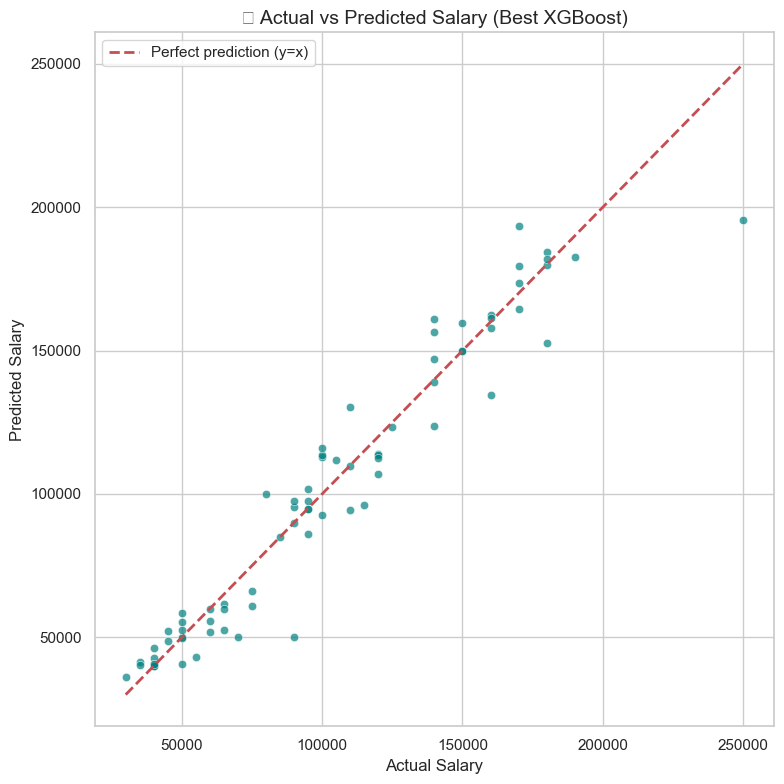

In [68]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.7, color='teal')

# Garis y=x sebagai baseline ideal
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=2, label='Perfect prediction (y=x)')

plt.title('🎯 Actual vs Predicted Salary (Best XGBoost)', fontsize=14)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()